In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [46]:
customer = pd.read_csv('kunden.csv', delimiter= ';')
table_customer = pd.DataFrame(customer)

visitor = pd.read_csv('besucher.csv', delimiter= ';', decimal= '.')
table_visitor = pd.DataFrame(visitor)

geodata = pd.read_csv('geo.txt', delimiter= '\t')
table_geo = pd.DataFrame(geodata)

print(table_customer)
print(table_visitor)
print(table_geo)

      Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0        64    66894.0   88160.31         1.0  43.0   K0310
1        54    77644.0  103145.70         1.0  40.0   K1042
2        55    44341.0   80565.16         0.0  37.0   K0382
3        49    67271.0   83949.89         0.0  42.0   K0498
4        46    49832.0   93781.58         0.0  41.0   K0552
...     ...        ...        ...         ...   ...     ...
1099     70    69581.0  103751.58         1.0  51.0   K0467
1100     38    48301.0   64230.98         1.0  33.0   K0122
1101     67    63547.0  103123.57         1.0  41.0   K1045
1102     37    32686.0   49215.87         1.0  36.0   K1096
1103     55    71240.0  106132.59         1.0  49.0   K0861

[1104 rows x 6 columns]
     Alter           Einkommen  Geschlecht  Zeit KundeNr
0       30    39919,0953348874           0  29,0   K1814
1       41   53430,67308587748           0  27,0   K1544
2       64    73163,2169267002           0  32,0   K1945
3       41  36761,482581315

In [47]:
print("Frage: Überschneiden sich Kundennummern?")
table_customer_resorted = table_customer[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Zeit', 'Preis']]
table_customer_sort_by_KNr = table_customer_resorted.sort_values('KundeNr')
table_visitor_resorted = table_visitor[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Zeit']]
table_visitor_sort_by_KNr = table_visitor_resorted.sort_values('KundeNr')
print(
)
sum_rows = len(table_customer_sort_by_KNr) + len(table_visitor_sort_by_KNr)
print(
)
print("Zeilen Insgesamt:", sum_rows)
print(
)
print("Kundendaten")
print(table_customer_sort_by_KNr)
print("Besucherdaten")
print(table_visitor_sort_by_KNr)
print(
)
print("Antwort: Die Kundennummern gehen nahtlos ineinander über.")

Frage: Überschneiden sich Kundennummern?


Zeilen Insgesamt: 1995

Kundendaten
    KundeNr  Geschlecht  Alter  Einkommen  Zeit      Preis
476   K0001         1.0     68    89437.0  62.0  114481.90
892   K0002         1.0     58    65271.0  44.0  106258.99
225   K0003         1.0     44    48195.0  29.0   85705.57
174   K0004         0.0     37    48957.0  36.0   76412.36
991   K0005         0.0     50    56621.0  40.0   92898.67
..      ...         ...    ...        ...   ...        ...
240   K1100         1.0     61    82624.0  59.0  134755.80
422   K1101         1.0     39    37905.0  32.0   61717.86
758   K1102         1.0     39    40159.0  37.0   67170.69
813   K1103         0.0     48    45545.0  30.0   75700.83
829   K1104         1.0     63    80414.0  49.0  101554.64

[1104 rows x 6 columns]
Besucherdaten
    KundeNr  Geschlecht  Alter          Einkommen  Zeit
454   K1105           0     42  57149,49800655036  35,0
812   K1106           1     34  43358,56434967347  33,0
229   

In [48]:
print("Wir benutzen die Funktion 'merge: outer join' mit dem 'Key: KundeNr'") 
print("jedem Kunden bzw. Besucher das Attribut Niederlassung zuzuordnen.")
print(
)
customer_merge = pd.merge(table_customer_sort_by_KNr, table_geo, on = 'KundeNr', how = 'outer')
customer_geo = customer_merge.head(1104)
visitor_merge = pd.merge(table_visitor_sort_by_KNr, table_geo, on='KundeNr', how='outer')
visitor_geo = visitor_merge.head(891)
print("Kundendaten")
print(customer_geo)
print(
)
print("Besucherdaten")
print(visitor_geo)

Wir benutzen die Funktion 'merge: outer join' mit dem 'Key: KundeNr'
jedem Kunden bzw. Besucher das Attribut Niederlassung zuzuordnen.

Kundendaten
     KundeNr  Geschlecht  Alter  Einkommen  Zeit      Preis  Niederlassung
0      K0001         1.0   68.0    89437.0  62.0  114481.90        Sachsen
1      K0002         1.0   58.0    65271.0  44.0  106258.99            NRW
2      K0003         1.0   44.0    48195.0  29.0   85705.57         Hessen
3      K0004         0.0   37.0    48957.0  36.0   76412.36         Bayern
4      K0005         0.0   50.0    56621.0  40.0   92898.67         Bayern
...      ...         ...    ...        ...   ...        ...            ...
1099   K1100         1.0   61.0    82624.0  59.0  134755.80         Berlin
1100   K1101         1.0   39.0    37905.0  32.0   61717.86         Hessen
1101   K1102         1.0   39.0    40159.0  37.0   67170.69  Niedersachsen
1102   K1103         0.0   48.0    45545.0  30.0   75700.83         Berlin
1103   K1104         1.0   

In [49]:
print("Frage: gibt es leere Zellen in den Kundendaten?")
print(
    )      
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Antwort: Ja, folgende:")
print(customer_isna_rows)

print(
    )
print("Frage: gibt es leere Zellen in den Kundendaten?")
visitor_isna_rows = visitor_geo[visitor_geo.isna().any(axis = 1)]
print(visitor_isna_rows)
print("Nein.")

Frage: gibt es leere Zellen in den Kundendaten?

Antwort: Ja, folgende:
    KundeNr  Geschlecht  Alter  Einkommen  Zeit      Preis  \
23    K0024         NaN   41.0    46542.0  40.0   63477.00   
89    K0090         NaN   64.0    83452.0  62.0  133180.70   
165   K0166         NaN   53.0    49798.0  39.0   61329.51   
324   K0325         NaN   52.0    66602.0  45.0   98756.07   
789   K0790         NaN   67.0    91461.0  66.0  131748.07   

           Niederlassung  
23     Baden-Württemberg  
89         Niedersachsen  
165  Nordrhein-Westfalen  
324               Bayern  
789               Berlin  

Frage: gibt es leere Zellen in den Kundendaten?
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Zeit, Niederlassung]
Index: []
Nein.


In [50]:
# Hier beginnt die Datenbereinigung mit der Spalte Geschlecht

Frage: Wie möchten wir die leeren Felder ersetzen.
Antwort: Wir möchten den Prozentualen Anteil von Männern und Frauen beibehalten.
Prozentualer Anteil von 1.0: 63.77%
Prozentualer Anteil von 0.0: 36.23%

Nun ersetzen wir die leeren Felder anhand der Prozentzahlen und prüfen ob noch leere Felder existieren.
Gibt es noch NaN-Werte in 'Geschlecht'?
True
Wir ersetzen alle 0.0 Werte mit 'Weiblich' und alle 1.0 Werte mit 'Männlich'.

Kundendaten
     KundeNr  Geschlecht  Alter  Einkommen  Zeit      Preis  Niederlassung
0      K0001         1.0   68.0    89437.0  62.0  114481.90        Sachsen
1      K0002         1.0   58.0    65271.0  44.0  106258.99            NRW
2      K0003         1.0   44.0    48195.0  29.0   85705.57         Hessen
3      K0004         0.0   37.0    48957.0  36.0   76412.36         Bayern
4      K0005         0.0   50.0    56621.0  40.0   92898.67         Bayern
...      ...         ...    ...        ...   ...        ...            ...
1099   K1100         1.0   61.

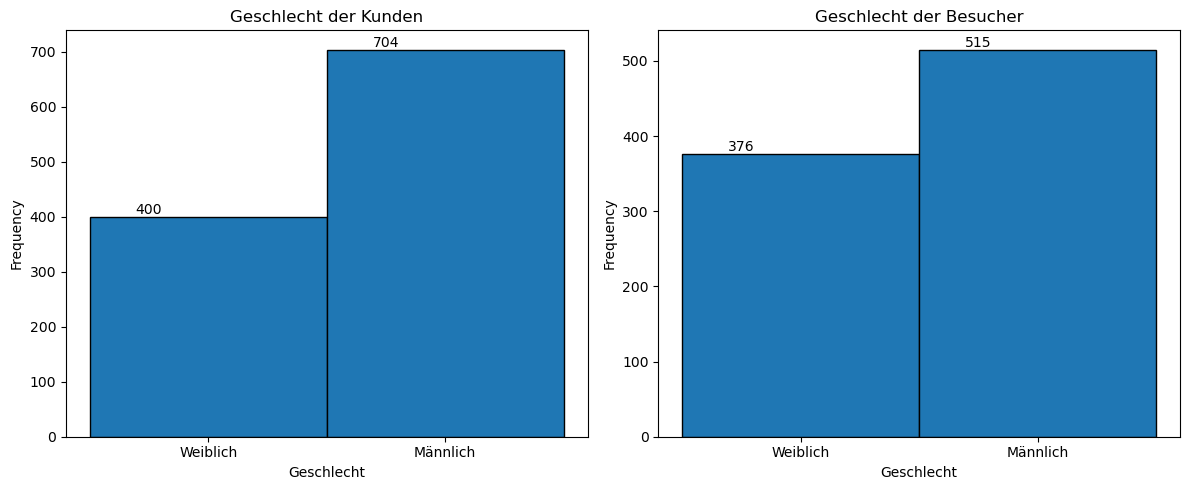

In [102]:
print("Frage: Wie möchten wir die leeren Felder ersetzen.")
print("Antwort: Wir möchten den Prozentualen Anteil von Männern und Frauen beibehalten.")
counts = customer_geo['Geschlecht'].value_counts(normalize=True)
percentage_1 = counts.get(1.0, 0)
percentage_0 = counts.get(0.0, 0)
print(f"Prozentualer Anteil von 1.0: {percentage_1:.2%}")
print(f"Prozentualer Anteil von 0.0: {percentage_0:.2%}")
print(
)
print("Nun ersetzen wir die leeren Felder anhand der Prozentzahlen und prüfen ob noch leere Felder existieren.")

nan_indices = customer_geo[customer_geo['Geschlecht'].isnull()].index
replacement_values = np.random.choice([1.0, 0.0], size=len(nan_indices), p=[percentage_1, percentage_0])
customer_geo.loc[nan_indices, 'Geschlecht'] = replacement_values

# Prüfen, ob noch leere Felder existieren
print("Gibt es noch NaN-Werte in 'Geschlecht'?")
print(customer_geo['Geschlecht'].isnull().sum() == 0)

Kundendaten_01 = customer_geo.copy() 
Besucherdaten_01 = visitor_geo.copy()  

#Kundendaten_01['Geschlecht'] = Kundendaten_01['Geschlecht'].replace({1.0: 'Männlich', 0.0: 'Weiblich'})
#Besucherdaten_01['Geschlecht'] = Besucherdaten_01['Geschlecht'].replace({1.0: 'Männlich', 0.0: 'Weiblich'})
print("Wir ersetzen alle 0.0 Werte mit 'Weiblich' und alle 1.0 Werte mit 'Männlich'.")
print(
)
print("Kundendaten")
print(Kundendaten_01)

print("Besucherdaten")
print(Besucherdaten_01)
print(
)
print("Es sind keine leeren Felder mehr vorhanden.")
print("Geschlechterbezeichnung wurde eingefügt.")
print(
)
print("Die Daten zum Geschlecht der Kunden und Besucher sind so verteilt")
print(
)   
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Kundendaten_01
axs[0].hist(Kundendaten_01['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Weiblich', 'Männlich'])
axs[0].set_xlabel('Geschlecht')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Geschlecht der Kunden')

# Anzahl über den Säulen platzieren
counts_kunde, bins_kunde = np.histogram(Kundendaten_01['Geschlecht'], bins=[-0.5, 0.5, 1.5])
for count, bin in zip(counts_kunde, bins_kunde):
    axs[0].text(bin + 0.25, count + 0.05, str(int(count)), ha='center', va='bottom')

# Histogramm für Besucherdaten_01
axs[1].hist(Besucherdaten_01['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Weiblich', 'Männlich'])
axs[1].set_xlabel('Geschlecht')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Geschlecht der Besucher')

# Anzahl über den Säulen platzieren
counts_besucher, bins_besucher = np.histogram(Besucherdaten_01['Geschlecht'], bins=[-0.5, 0.5, 1.5])
for count, bin in zip(counts_besucher, bins_besucher):
    axs[1].text(bin + 0.25, count + 0.05, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Kundendaten_02 = Kundendaten_01
Besucherdaten_02 = Besucherdaten_01
# Ersetzen der Werte in der Spalte "Geschlecht"
Kundendaten_02['Geschlecht'] = Kundendaten_02['Geschlecht'].replace({0.0: 'Weiblich', 1.0: 'Männlich'})
Besucherdaten_02['Geschlecht'] = Besucherdaten_02['Geschlecht'].replace({0.0: 'Weiblich', 1.0: 'Männlich'})

    KundeNr Geschlecht  Alter          Einkommen  Zeit          Niederlassung
0     K1105   Weiblich   42.0  57149,49800655036  35,0                 Hessen
1     K1106   Männlich   34.0  43358,56434967347  33,0                 Berlin
2     K1107   Männlich   33.0  45748,42693618564  55,0          Niedersachsen
3     K1108   Männlich   57.0  58633,96976384482  32,0              Thüringen
4     K1109   Weiblich   43.0  53592,01268373325  31,0    Nordrhein-Westfalen
..      ...        ...    ...                ...   ...                    ...
886   K1991   Männlich   48.0  59967,31328247114  21,0                 Hessen
887   K1992   Männlich   67.0  81521,76144297997  21,0      Baden-Württemberg
888   K1993   Weiblich   40.0  41616,57298010873  48,0    Nordrhein-Westfalen
889   K1994   Männlich   49.0   76602,7888395788  19,0                 Berlin
890   K1995   Männlich   49.0  54754,52544962578  44,0  Berlin-Charlottenburg

[891 rows x 6 columns]


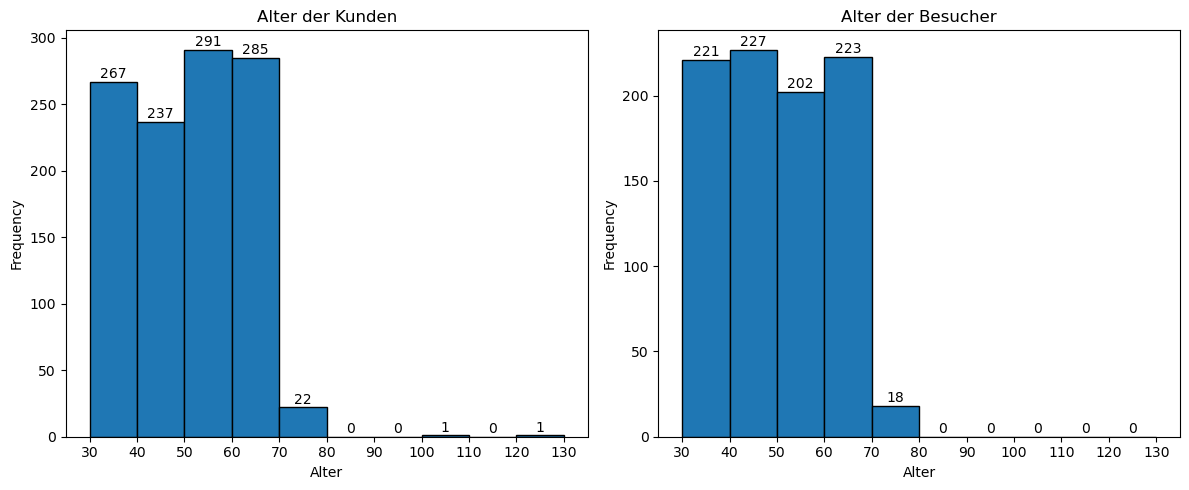

Bereinigung für Kundendaten_02:
Untergrenze für Ausreißer in Alter: 8.5
Obergrenze für Ausreißer in Alter: 92.5
Ausreißer in Alter:
    KundeNr Geschlecht  Alter  Einkommen  Zeit      Preis      Niederlassung
38    K0039   Männlich  120.0    61857.0  52.0  104214.07  Baden-Württemberg
493   K0494   Weiblich  100.0    88749.0  64.0  119134.23             Bayern

Bereinigung für Besucherdaten_02:
Untergrenze für Ausreißer in Alter: 10.0
Obergrenze für Ausreißer in Alter: 90.0
Ausreißer in Alter:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Zeit, Niederlassung]
Index: []



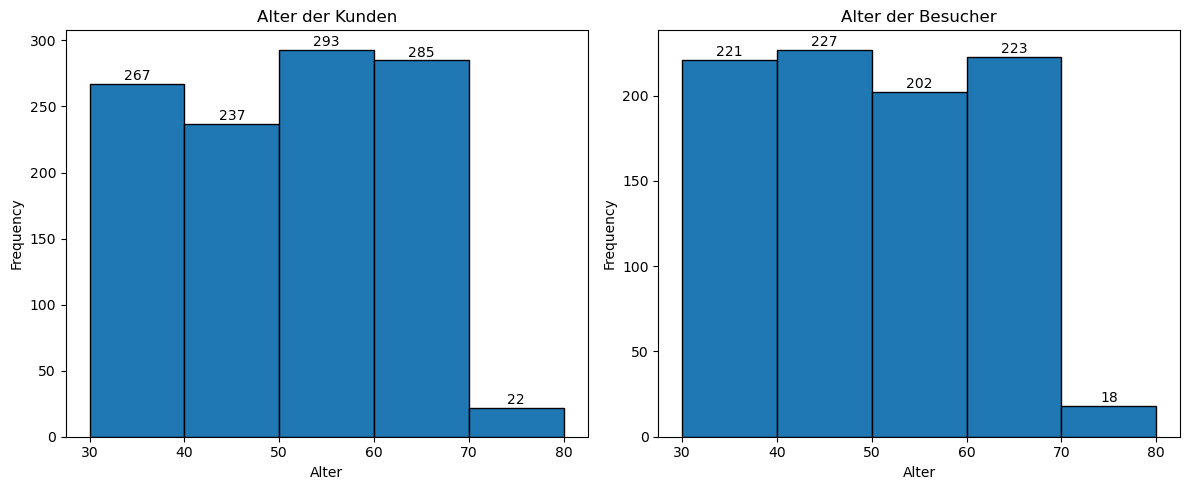

KundeNr           object
Geschlecht        object
Alter            float64
Einkommen         object
Zeit              object
Niederlassung     object
dtype: object
    KundeNr Geschlecht  Alter          Einkommen  Zeit          Niederlassung
0     K1105   Weiblich   42.0  57149,49800655036  35,0                 Hessen
1     K1106   Männlich   34.0  43358,56434967347  33,0                 Berlin
2     K1107   Männlich   33.0  45748,42693618564  55,0          Niedersachsen
3     K1108   Männlich   57.0  58633,96976384482  32,0              Thüringen
4     K1109   Weiblich   43.0  53592,01268373325  31,0    Nordrhein-Westfalen
..      ...        ...    ...                ...   ...                    ...
886   K1991   Männlich   48.0  59967,31328247114  21,0                 Hessen
887   K1992   Männlich   67.0  81521,76144297997  21,0      Baden-Württemberg
888   K1993   Weiblich   40.0  41616,57298010873  48,0    Nordrhein-Westfalen
889   K1994   Männlich   49.0   76602,7888395788  19,0  

In [103]:
# Histogramme erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Kundendaten_02
axs[0].hist(Kundendaten_02['Alter'], bins=np.arange(30, 131, 10), edgecolor='black')
axs[0].set_xticks(np.arange(30, 131, 10))
axs[0].set_xlabel('Alter')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Alter der Kunden')

# Anzahl über den Säulen platzieren
counts_kunde, bins_kunde = np.histogram(Kundendaten_02['Alter'], bins=np.arange(30, 131, 10))
for count, bin in zip(counts_kunde, bins_kunde[:-1]):
    axs[0].text(bin + 5, count + 0.5, str(int(count)), ha='center', va='bottom')

print(Besucherdaten_02)
# Histogramm für Besucherdaten_02
axs[1].hist(Besucherdaten_02['Alter'], bins=np.arange(30, 131, 10), edgecolor='black')
axs[1].set_xticks(np.arange(30, 131, 10))
axs[1].set_xlabel('Alter')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Alter der Besucher')

# Anzahl über den Säulen platzieren
counts_besucher, bins_besucher = np.histogram(Besucherdaten_02['Alter'], bins=np.arange(30, 131, 10))
for count, bin in zip(counts_besucher, bins_besucher[:-1]):
    axs[1].text(bin + 5, count + 0.5, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Funktion zur Bereinigung der Ausreißer
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Bestimmen der unteren und oberen Grenzen für Ausreißer
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identifizieren von Ausreißern
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Untergrenze für Ausreißer in {column}: {lower_bound}")
    print(f"Obergrenze für Ausreißer in {column}: {upper_bound}")
    print(f"Ausreißer in {column}:")
    print(outliers)
    print()

    # Ersetzen der Ausreißer mit dem Median
    median = df[column].median()
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

# Bereinigung der Ausreißer in Kundendaten_02 und Besucherdaten_02
Kundendaten_03 = Kundendaten_02.copy()
Besucherdaten_03 = Besucherdaten_02.copy()

print("Bereinigung für Kundendaten_02:")
Kundendaten_03 = remove_outliers(Kundendaten_03, 'Alter')

print("Bereinigung für Besucherdaten_02:")
Besucherdaten_03 = remove_outliers(Besucherdaten_03, 'Alter')

# Histogramme erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Kundendaten_03
axs[0].hist(Kundendaten_03['Alter'], bins=np.arange(30, 81, 10), edgecolor='black')
axs[0].set_xticks(np.arange(30, 81, 10))
axs[0].set_xlabel('Alter')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Alter der Kunden')

# Anzahl über den Säulen platzieren
counts_kunde, bins_kunde = np.histogram(Kundendaten_03['Alter'], bins=np.arange(30, 81, 10))
for count, bin in zip(counts_kunde, bins_kunde[:-1]):
    axs[0].text(bin + 5, count + 0.5, str(int(count)), ha='center', va='bottom')

# Histogramm für Besucherdaten_03
axs[1].hist(Besucherdaten_03['Alter'], bins=np.arange(30, 81, 10), edgecolor='black')
axs[1].set_xticks(np.arange(30, 81, 10))
axs[1].set_xlabel('Alter')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Alter der Besucher')

# Anzahl über den Säulen platzieren
counts_besucher, bins_besucher = np.histogram(Besucherdaten_03['Alter'], bins=np.arange(30, 81, 10))
for count, bin in zip(counts_besucher, bins_besucher[:-1]):
    axs[1].text(bin + 5, count + 0.5, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()
print(Besucherdaten_03.dtypes)
print(Besucherdaten_03)
Besucherdaten_03['Zeit'] = Besucherdaten_03['Zeit'].str.replace(',', '.').astype(float)

C:\Users\seank\AppData\Local\Temp\ipykernel_7504\2622268542.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Bereinigung für Kundendaten_03:
Anzahl der Ausreißer in Einkommen: 3
Ausreißer in Einkommen:
     KundeNr Geschlecht  Alter     Einkommen  Zeit      Preis  \
700    K0701   Weiblich   68.0  1.000000e+09  52.0   87209.72   
1020   K1021   Männlich   69.0  0.000000e+00  65.0  125140.05   
1082   K1083   Weiblich   59.0 -6.284037e+04  46.0   92837.59   

            Niederlassung  
700   Nordrhein-Westfalen  
1020               Bayern  
1082    Baden-Württemberg  

Durchschnitt der verbleibenden Daten: 58894.676657584016
Bereinigung für Besucherdaten_03:
Anzahl der Ausreißer in Einkommen: 0
Ausreißer in Einkommen:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Zeit, Niederlassung]
Index: []

Durchschnitt der verbleibenden Daten: 59367.93604938272


ValueError: Image size of 1005x1349519 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x500 with 2 Axes>

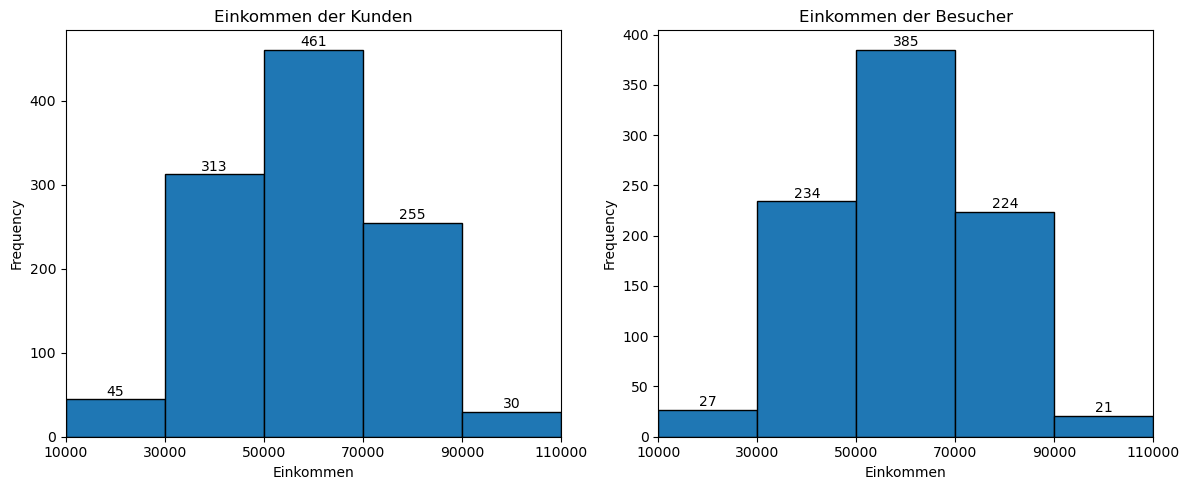

In [104]:
# Histogramme erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Kundendaten_04
axs[0].hist(Kundendaten_03['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000), edgecolor='black')
axs[0].set_xticks(np.arange(10000, 120000, 20000))
axs[0].set_xlim([10000, 110000])
axs[0].set_xlabel('Einkommen')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Einkommen der Kunden')

# Anzahl über den Säulen platzieren
counts_kunde, bins_kunde = np.histogram(Kundendaten_04['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000))
for count, bin in zip(counts_kunde, bins_kunde[:-1]):
    axs[0].text(bin + 10000, count + 0.5, str(int(count)), ha='center', va='bottom')

# Histogramm für Besucherdaten_04
axs[1].hist(Besucherdaten_03['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000), edgecolor='black')
axs[1].set_xticks(np.arange(10000, 120000, 20000))
axs[1].set_xlim([10000, 110000])
axs[1].set_xlabel('Einkommen')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Einkommen der Besucher')

# Anzahl über den Säulen platzieren
counts_besucher, bins_besucher = np.histogram(Besucherdaten_04['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000))
for count, bin in zip(counts_besucher, bins_besucher[:-1]):
    axs[1].text(bin + 10000, count + 0.5, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
# Konvertiere die Spalte 'Einkommen' zu float und runde auf zwei Nachkommastellen für Besucherdaten_03
Besucherdaten_03['Einkommen'] = Besucherdaten_03['Einkommen'].astype(str).str.replace(',', '.').astype(float).round(2)

# Funktion zur Bereinigung der Ausreißer und zum Entfernen
def remove_outliers(df, column, lower_bound=10000, upper_bound=150000):
    # Sicherstellen, dass die Spalte numerisch ist
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Identifizieren von Ausreißern
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Anzahl der Ausreißer in {column}: {len(outliers)}")
    print(f"Ausreißer in {column}:")
    print(outliers)
    print()

    # Berechnen des Durchschnitts nach Entfernung der Ausreißer
    mean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].mean()
    print(f"Durchschnitt der verbleibenden Daten: {mean}")

    # Ersetzen der Ausreißer durch den Durchschnitt
    df.loc[outliers.index, column] = mean

    return df

# Bereinigung der Ausreißer und Entfernen in Kundendaten_03
Kundendaten_04 = Kundendaten_03.copy()
print("Bereinigung für Kundendaten_03:")
Kundendaten_04 = remove_outliers(Kundendaten_04, 'Einkommen')

# Bereinigung der Ausreißer und Entfernen in Besucherdaten_03
Besucherdaten_04 = Besucherdaten_03.copy()
print("Bereinigung für Besucherdaten_03:")
Besucherdaten_04 = remove_outliers(Besucherdaten_04, 'Einkommen')

# Histogramme erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Kundendaten_04
axs[0].hist(Kundendaten_04['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000), edgecolor='black')
axs[0].set_xticks(np.arange(10000, 120000, 20000))
axs[0].set_xlim([10000, 110000])
axs[0].set_xlabel('Einkommen')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Einkommen der Kunden')

# Anzahl über den Säulen platzieren
counts_kunde, bins_kunde = np.histogram(Kundendaten_04['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000))
for count, bin in zip(counts_kunde, bins_kunde[:-1]):
    axs[0].text(bin + 10000, count + 0.5, str(int(count)), ha='center', va='bottom')

# Histogramm für Besucherdaten_04
axs[1].hist(Besucherdaten_04['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000), edgecolor='black')
axs[1].set_xticks(np.arange(10000, 120000, 20000))
axs[1].set_xlim([10000, 110000])
axs[1].set_xlabel('Einkommen')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Einkommen der Besucher')

# Anzahl über den Säulen platzieren
counts_besucher, bins_besucher = np.histogram(Besucherdaten_04['Einkommen'].dropna(), bins=np.arange(10000, 120000, 20000))
for count, bin in zip(counts_besucher, bins_besucher[:-1]):
    axs[1].text(bin + 10000, count + 0.5, str(int(count)), ha='center', va='bottom')

plt.tight_layout()

In [105]:
print("Treten unter den Values für 'Niederlassung Doppelungen auf?" " Ja, diese:.")
print(
    )
print(Kundendaten_04['Niederlassung'].unique())
print(Besucherdaten_04['Niederlassung'].unique())
print(
    )
print("Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.")

Kundendaten_04['Niederlassung'] = Kundendaten_04['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})

Besucherdaten_04['Niederlassung'] = Besucherdaten_04['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})
print(
)
print("Sind nun noch Doppelungen vorhanden?")
print(
)
print(Kundendaten_04['Niederlassung'].unique())
print(Besucherdaten_04['Niederlassung'].unique())  
print(
)
print("Nein. Jedes Bundesland tritt jetzt nur noch in einer Schreibweise auf.")

Treten unter den Values für 'Niederlassung Doppelungen auf? Ja, diese:.

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']
['Hessen' 'Berlin' 'Niedersachsen' 'Thüringen' 'Nordrhein-Westfalen'
 'Baden-Württemberg' 'Bayern' 'Hamburg' 'Sachsen' 'Brandenburg' 'BERLIN'
 'Düsseldorf' 'NRW' 'Berlin-Charlottenburg']

Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.

Sind nun noch Doppelungen vorhanden?

['Sachsen' 'Nordrhein-Westfalen' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen' 'Hamburg' 'Düsseldorf']
['Hessen' 'Berlin' 'Niedersachsen' 'Thüringen' 'Nordrhein-Westfalen'
 'Baden-Württemberg' 'Bayern' 'Hamburg' 'Sachsen' 'Brandenburg'
 'Düsseldorf']

Nein. Jedes Bundesland tritt jetzt nur noch in einer Schreibw

In [113]:
# Histogramme erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Kundendaten_04
axs[0].hist(Kundendaten_04['Zeit'], bins=np.arange(10, 91, 20), edgecolor='black')
axs[0].set_xticks(np.arange(10, 91, 20))
axs[0].set_xlabel('Zeit')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Zeit der Kunden')

# Anzahl über den Säulen platzieren
counts_kunde, bins_kunde = np.histogram(Kundendaten_04['Zeit'], bins=np.arange(10, 91, 20))
for count, bin in zip(counts_kunde, bins_kunde[:-1]):
    axs[0].text(bin + 10, count + 0.5, str(int(count)), ha='center', va='bottom')

# Histogramm für Besucherdaten_04 (nach Konvertierung)
axs[1].hist(Besucherdaten_04['Zeit'], bins=np.arange(10, 91, 20), edgecolor='black')
axs[1].set_xticks(np.arange(10, 91, 20))
axs[1].set_xlabel('Zeit')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Zeit der Besucher')

# Anzahl über den Säulen platzieren
counts_besucher, bins_besucher = np.histogram(Besucherdaten_04['Zeit'], bins=np.arange(10, 91, 20))
for count, bin in zip(counts_besucher, bins_besucher[:-1]):
    axs[1].text(bin + 10, count + 0.5, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Funktion zur Bereinigung der Ausreißer und Ersetzung durch Durchschnitt
def remove_outliers_and_replace_with_mean(df, column, lower_bound, upper_bound):
    # Sicherstellen, dass die Spalte numerisch ist
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Identifizieren von Ausreißern
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Entfernen der Ausreißer
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Berechnung des Durchschnitts ohne Ausreißer
    mean_value = df_no_outliers[column].mean()
    
    # Ersetzen der Ausreißer durch den Durchschnitt
    df.loc[outliers.index, column] = mean_value
    
    return df, outliers

# Bereinigung der Ausreißer in der Spalte 'Zeit'
Kundendaten_05, outliers_kunden = remove_outliers_and_replace_with_mean(Kundendaten_04.copy(), 'Zeit', 20, 90)
Besucherdaten_05, outliers_besucher = remove_outliers_and_replace_with_mean(Besucherdaten_04.copy(), 'Zeit', 10, 90)

# Anzeigen der Ausreißer
print("Ausreißer in Kundendaten_04:")
print(outliers_kunden)
print("\nAusreißer in Besucherdaten_04:")
print(outliers_besucher)

print("Wir setzen die Untergrenze in Sachen 'Zeit' auf 20 bzw. 10 Wir glauben,)
print("dass diese niedrig aber für Einzelfälle Realistisch ist.")
print("Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,") 
print("dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und")
print("länger überlegende Kunden im Geschäft zu haben.")
print("Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.")

# Histogramme erstellen
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Kundendaten_04
axs[0].hist(Kundendaten_05['Zeit'], bins=np.arange(10, 91, 20), edgecolor='black')
axs[0].set_xticks(np.arange(10, 91, 20))
axs[0].set_xlabel('Zeit')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Zeit der Kunden')

# Anzahl über den Säulen platzieren
counts_kunde, bins_kunde = np.histogram(Kundendaten_04['Zeit'], bins=np.arange(10, 91, 20))
for count, bin in zip(counts_kunde, bins_kunde[:-1]):
    axs[0].text(bin + 10, count + 0.5, str(int(count)), ha='center', va='bottom')

# Histogramm für Besucherdaten_04 (nach Konvertierung)
axs[1].hist(Besucherdaten_05['Zeit'], bins=np.arange(10, 91, 20), edgecolor='black')
axs[1].set_xticks(np.arange(10, 91, 20))
axs[1].set_xlabel('Zeit')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Zeit der Besucher')

# Anzahl über den Säulen platzieren
counts_besucher, bins_besucher = np.histogram(Besucherdaten_04['Zeit'], bins=np.arange(10, 91, 20))
for count, bin in zip(counts_besucher, bins_besucher[:-1]):
    axs[1].text(bin + 10, count + 0.5, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 59) (3970016843.py, line 59)

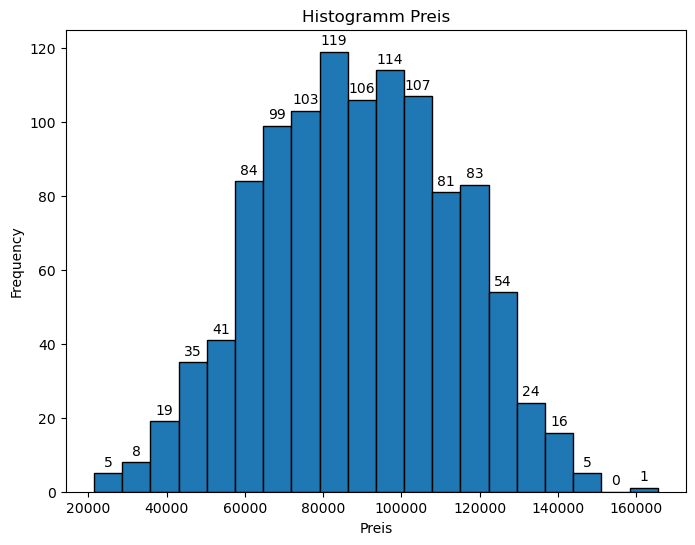

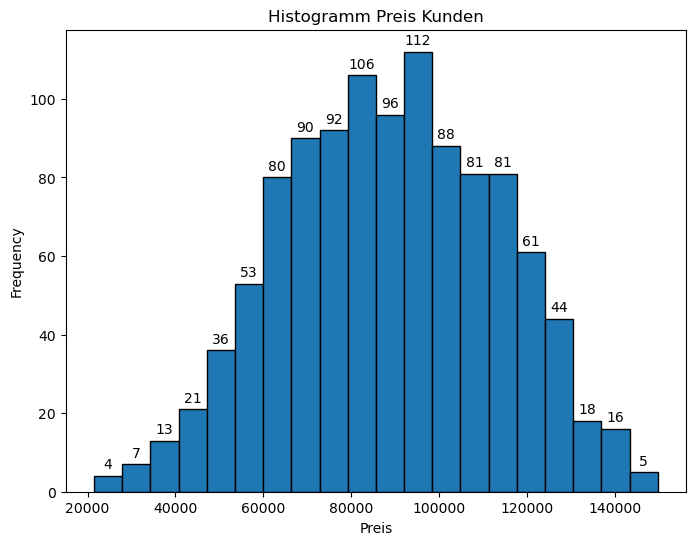

In [108]:
# Original-Histogramm der Spalte 'Preis'
plt.figure(figsize=(8, 6))
plt.hist(Kundendaten_05['Preis'], bins=20, edgecolor='black')
plt.xlabel('Preis')
plt.ylabel('Frequency')
plt.title('Histogramm Preis Kunden')

# Anzahl über den Säulen platzieren
for bin_edge in plt.gca().patches:
    plt.gca().annotate(f"{int(bin_edge.get_height())}", 
                       xy=(bin_edge.get_x() + bin_edge.get_width() / 2, bin_edge.get_height()), 
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

# Berechnung der Quartile und des IQR
q1 = Kundendaten_05['Preis'].quantile(0.25)
q3 = Kundendaten_05['Preis'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifizierung der Ausreißer
outliers = Kundendaten_05[(Kundendaten_05['Preis'] < lower_bound) | (Kundendaten_05['Preis'] > upper_bound)]

# Ersetzen der Ausreißer mit dem Median
median_price = Kundendaten_05['Preis'].median()
Kundendaten_bereinigt = Kundendaten_05.copy()  # Kopie des DataFrame für die Bereinigung
Kundendaten_bereinigt.loc[outliers.index, 'Preis'] = median_price

# Histogramm der bereinigten Preise
plt.figure(figsize=(8, 6))
plt.hist(Kundendaten_bereinigt['Preis'], bins=20, edgecolor='black')
plt.xlabel('Preis')
plt.ylabel('Frequency')
plt.title('Histogramm Preis Kunden')

# Anzahl über den Säulen platzieren
for bin_edge in plt.gca().patches:
    plt.gca().annotate(f"{int(bin_edge.get_height())}", 
                       xy=(bin_edge.get_x() + bin_edge.get_width() / 2, bin_edge.get_height()), 
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

In [109]:
print(Kundendaten_bereinigt)
Besucherdaten_bereinigt = Besucherdaten_05
print(Besucherdaten_bereinigt)


     KundeNr Geschlecht  Alter  Einkommen  Zeit      Preis  \
0      K0001   Männlich   68.0    89437.0  62.0  114481.90   
1      K0002   Männlich   58.0    65271.0  44.0  106258.99   
2      K0003   Männlich   44.0    48195.0  29.0   85705.57   
3      K0004   Weiblich   37.0    48957.0  36.0   76412.36   
4      K0005   Weiblich   50.0    56621.0  40.0   92898.67   
...      ...        ...    ...        ...   ...        ...   
1099   K1100   Männlich   61.0    82624.0  59.0  134755.80   
1100   K1101   Männlich   39.0    37905.0  32.0   61717.86   
1101   K1102   Männlich   39.0    40159.0  37.0   67170.69   
1102   K1103   Weiblich   48.0    45545.0  30.0   75700.83   
1103   K1104   Männlich   63.0    80414.0  49.0  101554.64   

            Niederlassung  
0                 Sachsen  
1     Nordrhein-Westfalen  
2                  Hessen  
3                  Bayern  
4                  Bayern  
...                   ...  
1099               Berlin  
1100               Hessen  
110

In [115]:
# Prüfen, ob alle Werte ganzzahlig sind in den Spalten "Alter" und "Zeit"
if Kundendaten_bereinigt['Alter'].apply(float.is_integer).all():
    Kundendaten_bereinigt['Alter'] = Kundendaten_bereinigt['Alter'].astype(int)
    
if Besucherdaten_bereinigt['Zeit'].dropna().apply(float.is_integer).all():
    Besucherdaten_bereinigt['Zeit'] = Besucherdaten_bereinigt['Zeit'].astype(int)

# Überprüfen der Änderungen
print("Datentypen nach der Konvertierung:")
print("Kundendaten_bereinigt:")
print(Kundendaten_bereinigt.dtypes)

print("\nBesucherdaten_bereinigt:")
print(Besucherdaten_bereinigt.dtypes)

TypeError: descriptor 'is_integer' for 'float' objects doesn't apply to a 'int' object

In [120]:
# Falls notwendig, den Index zurücksetzen und 'KundeNr' als normale Spalte hinzufügen
Kundendaten_bereinigt.reset_index(inplace=True)
Besucherdaten_bereinigt.reset_index(inplace=True)

# Optional: Nochmals überprüfen, ob 'KundeNr' jetzt eine Spalte ist
print(Kundendaten_bereinigt.columns)
print(Besucherdaten_bereinigt.columns)

# Setzen Sie 'KundeNr' als Index, wenn erforderlich
Kundendaten_bereinigt.set_index('KundeNr', inplace=True)
Besucherdaten_bereinigt.set_index('KundeNr', inplace=True)

# Auswahl der gewünschten Spalten
Kundendaten_bereinigt = Kundendaten_bereinigt[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit', 'Preis']]
Besucherdaten_bereinigt = Besucherdaten_bereinigt[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit']]

# Zusammenführen der DataFrames
df = pd.concat([Kundendaten_bereinigt, Besucherdaten_bereinigt])
Kunden = Kundendaten_bereinigt
Besucher = Besucherdaten_bereinigt

# Ausgabe des resultierenden DataFrames
print(df)
print(Kunden)
print(Besucher)

Index(['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit',
       'Preis'],
      dtype='object')
Index(['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit'], dtype='object')
        Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                   
K0001     Männlich     68   89437.00              Sachsen  62.0  114481.90
K0002     Männlich     58   65271.00  Nordrhein-Westfalen  44.0  106258.99
K0003     Männlich     44   48195.00               Hessen  29.0   85705.57
K0004     Weiblich     37   48957.00               Bayern  36.0   76412.36
K0005     Weiblich     50   56621.00               Bayern  40.0   92898.67
...            ...    ...        ...                  ...   ...        ...
K1991     Männlich     48   59967.31               Hessen  21.0        NaN
K1992     Männlich     67   81521.76    Baden-Württemberg  21.0        NaN
K1993     Weiblich     40   41616.57

In [ ]:
# Aufgabe 1: Wie viele Autos wurden verkauft?

In [121]:
verkaufte_Autos = df[df['Preis'].notna()]
Anzahl_verkaufter_Autos = len(verkaufte_Autos)

print(f"Es wurden {Anzahl_verkaufter_Autos} Autos verkauft.")

Es wurden 1104 Autos verkauft.


In [ ]:
# Aufgabe 2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [122]:
# Min, Max und Mean der Spalte 'Preis'
preis_min = df['Preis'].min()
preis_max = df['Preis'].max()
preis_mean = df['Preis'].mean().round(2)

# Ausgabe der Ergebnisse
print(f"Der Mindestpreis ist:          {preis_min:,}€")
print(f"Der Maximalpreis ist:         {preis_max:,}€")
print(f"Der Durchschnittspreis ist:    {preis_mean:,}€")

Der Mindestpreis ist:          21,471.65€
Der Maximalpreis ist:         149,827.25€
Der Durchschnittspreis ist:    88,905.86€


In [ ]:
# Aufgabe 3: Wie hoch war der Gesamtumsatz?

In [123]:
Gesamtumsatz = df['Preis'].sum()
print(f"Der Gesamtumsatz liegt bei: {Gesamtumsatz:,}€")

Der Gesamtumsatz liegt bei: 98,152,068.52499999€


In [ ]:
# Aufgabe 4: Wie viele Autos wurden pro Bundesland verkauft?

In [ ]:
# Aufgabe 5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [ ]:
# Aufgabe 6: In welchem Bundesland wurde das teuerste Auto verkauft?

In [ ]:
# Aufgabe 7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

In [ ]:
# Aufgabe 8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

In [ ]:
# Aufgabe 9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [ ]:
# Aufgabe 10: Bestimmen Sie, ob es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden 
#             und dem Durchschnittseinkommen der Besucher gibt.

In [ ]:
from scipy.stats import ttest_ind

# Beispielgruppen aus den beiden DataFrames
einkommen_der_kunden = customer_geo_retype['Einkommen']
einkommen_der_besucher = visitor_geo_retype['Einkommen']

# Welch-T-Test
t_stat, p_value = ttest_ind(einkommen_der_kunden, einkommen_der_besucher, equal_var=False)

print(f"Welch's T-Statistik: {t_stat}")
print(f"P-Wert: {p_value}")

In [ ]:
# Aufgabe 11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?

In [ ]:
correlation_matrix = df[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# Ausgabe der Korrelationsmatrix
print("Korrelationsmatrix (Pearson-Korrelation):")
print(correlation_matrix)
correlation_list = correlation_matrix.values.flatten().tolist()
correlation_list = [round(coeff, 2) for coeff in correlation_list]
print(
)
print("Hinweis: Die Funktion .corr('method='pearson') ignoriert alle Wertepaare bei denen ein Wert NaN ist.")
print(
)
alter_einkommen = "positive Korrelation. Ältere Personen tendieren dazu, höhere Einkommen zu haben."
alter_preis = "starke positive Korrelation. Ältere Personen neigen dazu, höhere Preise zu zahlen."
alter_zeit = "schwache positive Korrelation. Ältere Personen bleiben tendenziell etwas länger im Geschäft."
einkommen_preis = "sehr starke positive Korrelation. Personen mit höherem Einkommen tendieren dazu, höhere Preise zu zahlen."
einkommen_zeit = "moderate positive Korrelation. Personen mit höherem Einkommen bleiben tendenziell länger im Geschäft."
preis_zeit = "moderate positive Korrelation. Höhere Preise korrelieren mit einer tendenziell höheren Vorgangszeit."

KE_AE = correlation_list[1]
KE_AP = correlation_list[2]
KE_AZ = correlation_list[3]
KE_EP = correlation_list[6]
KE_EZ = correlation_list[7]
KE_PZ = correlation_list[11]
print("Interpretation der jeweiligen Korrelationskoefizienten")
print(
)
print("Alter - Einkommen korreliert mit:", KE_AE)
print(alter_einkommen)
print(
)
print("Alter - Preis korreliert mit", KE_AP)
print(alter_preis)
print(
)
print("Alter - Zeit korreliert mit", KE_AZ)
print(alter_zeit)
print(
)
print("Einkommen - Preis korreliert mit", KE_EP)
print(einkommen_preis)
print(
)
print("Einkommen - Preis korreliert mit", KE_EZ)
print(einkommen_zeit)
print(
)
print("Preis - Zeit korreliert mit", KE_PZ)
print(preis_zeit)

In [ ]:
# Aufgabe 12: Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteilt ist.

In [ ]:
# QQ-Plot für die Variable "Zeit"
zeit = df['Zeit'].dropna()

# QQ-Plot erstellen
stats.probplot(zeit, dist="norm", plot=plt)
plt.title('QQ-Plot für die Variable "Zeit"')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Empirische Quantile')
plt.grid(True)

In [ ]:
# Aufgabe 13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen?
#             Kundenabteilung hat vergessen, diese Informationen zu erfassen. Wir können davon aus
#             gehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit
#             aufgenommen haben.

In [ ]:
# Aufgabe 14: Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Wählen Sie die geeigneten
#             unabhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

In [ ]:
# Aufgabe 15: Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im
#             Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis
#             preis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit
#             einem Einkommen von 54.000 Euro.

In [ ]:
P_höherals_E = Kunden[Kunden['Preis'] > Kunden['Einkommen']]

# Filtern nach Zeilen, wo Alter den Wert 32 hat
P_höherals_E_32 = P_höherals_E[(P_höherals_E['Alter'] == 32) & (P_höherals_E['Geschlecht'] == 'Männlich')]
Kunden_32 = Kunden[(Kunden['Alter'] == 32) & (Kunden['Geschlecht'] == 'Männlich')]

print(Kunden_32)
print("\nZeilen, wo Alter den Wert 32 hat:")
print(P_höherals_E_32)


In [ ]:
# Import necessary libraries
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Prepare data for regression
X = customer_data[['Alter', 'Einkommen']]
y = customer_data['Preis']  # Assuming 'Preis' column is the target variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
predicted_price_32_30000 = model.predict([[32, 30000]])
predicted_price_51_54000 = model.predict([[51, 54000]])






In [ ]:
# Aufgabe 16: In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am
#             meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen
#             direkt vergleichbar sein. Wie sollen die Daten transformiert werden?

In [ ]:
ff

In [ ]:
# 16. Variable, die den Preis des Autos am meisten beeinflusst (Regressionskoeffizienten)
coefficients = model.coef_

# Display the results
predicted_price_32_30000, predicted_price_51_54000, coefficients


In [ ]:
# Aufgabe 17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt.
#             Verwenden Sie die entsprechende Methode.

In [ ]:
ff

In [ ]:
from sklearn.linear_model import LogisticRegression

# For logistic regression, we need a binary target variable.
# We'll create a binary target variable for demonstration purposes.
# Assuming 'Zeit' > 30 indicates a purchase (1), and 'Zeit' <= 30 indicates no purchase (0)
data['Purchase'] = (data['Zeit'] > 30).astype(int)

# Features and target variable
X_log = data[['Alter', 'Einkommen']]
y_log = data['Purchase']

# Fit a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_log, y_log)

# Display the coefficients
log_coefficients = log_model.coef_

In [ ]:
# Aufgabe 18: Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem
#             Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer
#             Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde
#             mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines
#             unserer Modelle kauft?

In [ ]:
# Aufgabe 19: Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen
#             len Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten
#             durchgeführt haben.

In [ ]:
# Aufgabe 20: Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen?
#             Welche zusätzlichen Informationen sollten gesammelt werden? 
#             Formulieren Sie zwei Vorschläge.

In [ ]:
...